In [ ]:
import pandas as pd
import string
import re
import nltk
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stock_df=pd.read_csv('/content/drive/MyDrive/Project and Coding/Stock Market Sentiment Analysis-NLP/stock_data.csv')

In [ ]:
stock_df.head(20)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
5,PGNX Over 3.04,1
6,AAP - user if so then the current downtrend wi...,-1
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1
8,GOOG - ower trend line channel test & volume s...,1
9,AAP will watch tomorrow for ONG entry.,1


In [ ]:
stock_df['Text_nlp']=stock_df['Text'].str.lower()
stock_df.head(20)

,Text,Sentiment,Text_nlp
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: aap movie. 55% return for the fea/geed i...
2,user I'd be afraid to short AMZN - they are lo...,1,user i'd be afraid to short amzn - they are lo...
3,MNTA Over 12.00,1,mnta over 12.00
4,OI Over 21.37,1,oi over 21.37
5,PGNX Over 3.04,1,pgnx over 3.04
6,AAP - user if so then the current downtrend wi...,-1,aap - user if so then the current downtrend wi...
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1,monday's relative weakness. nyx win tie tap ic...
8,GOOG - ower trend line channel test & volume s...,1,goog - ower trend line channel test & volume s...
9,AAP will watch tomorrow for ONG entry.,1,aap will watch tomorrow for ong entry.


In [ ]:
stock_df['Text_nlp']=stock_df['Text_nlp'].apply(contractions.fix)
stock_df.loc[10]
stock_df.head(20)

,Text,Sentiment,Text_nlp
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: aap movie. 55% return for the fea/geed i...
2,user I'd be afraid to short AMZN - they are lo...,1,user i would be afraid to short amzn - they ar...
3,MNTA Over 12.00,1,mnta over 12.00
4,OI Over 21.37,1,oi over 21.37
5,PGNX Over 3.04,1,pgnx over 3.04
6,AAP - user if so then the current downtrend wi...,-1,aap - user if so then the current downtrend wi...
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1,monday's relative weakness. nyx win tie tap ic...
8,GOOG - ower trend line channel test & volume s...,1,goog - ower trend line channel test & volume s...
9,AAP will watch tomorrow for ONG entry.,1,aap will watch tomorrow for ong entry.


In [ ]:
for i in range(len(stock_df)):
    stock_df.at[i, 'Text_nlp'] = re.sub(r"[_-]", " ", stock_df.at[i, 'Text_nlp'])
stock_df['Tokens']=stock_df['Text_nlp'].apply(word_tokenize)
#stock_df.loc[10]
stock_df.head(20)

,Text,Sentiment,Text_nlp,Tokens
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...,"[kickers, on, my, watchlist, xide, tit, soq, p..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: aap movie. 55% return for the fea/geed i...,"[user, :, aap, movie, ., 55, %, return, for, t..."
2,user I'd be afraid to short AMZN - they are lo...,1,user i would be afraid to short amzn they ar...,"[user, i, would, be, afraid, to, short, amzn, ..."
3,MNTA Over 12.00,1,mnta over 12.00,"[mnta, over, 12.00]"
4,OI Over 21.37,1,oi over 21.37,"[oi, over, 21.37]"
5,PGNX Over 3.04,1,pgnx over 3.04,"[pgnx, over, 3.04]"
6,AAP - user if so then the current downtrend wi...,-1,aap user if so then the current downtrend wi...,"[aap, user, if, so, then, the, current, downtr..."
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1,monday's relative weakness. nyx win tie tap ic...,"[monday, 's, relative, weakness, ., nyx, win, ..."
8,GOOG - ower trend line channel test & volume s...,1,goog ower trend line channel test & volume s...,"[goog, ower, trend, line, channel, test, &, vo..."
9,AAP will watch tomorrow for ONG entry.,1,aap will watch tomorrow for ong entry.,"[aap, will, watch, tomorrow, for, ong, entry, .]"


In [ ]:
stop_words=set(stopwords.words('english'))
def stopWordRemove(x):
  swRemoved=[]
  for word in x:
    if word not in stop_words:
      swRemoved.append(word)
  return swRemoved
stock_df['Tokens']=stock_df['Tokens'].apply(stopWordRemove)
stock_df.head(20)

,Text,Sentiment,Text_nlp,Tokens
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: aap movie. 55% return for the fea/geed i...,"[user, :, aap, movie, ., 55, %, return, fea/ge..."
2,user I'd be afraid to short AMZN - they are lo...,1,user i would be afraid to short amzn they ar...,"[user, would, afraid, short, amzn, looking, li..."
3,MNTA Over 12.00,1,mnta over 12.00,"[mnta, 12.00]"
4,OI Over 21.37,1,oi over 21.37,"[oi, 21.37]"
5,PGNX Over 3.04,1,pgnx over 3.04,"[pgnx, 3.04]"
6,AAP - user if so then the current downtrend wi...,-1,aap user if so then the current downtrend wi...,"[aap, user, current, downtrend, break, ., othe..."
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1,monday's relative weakness. nyx win tie tap ic...,"[monday, 's, relative, weakness, ., nyx, win, ..."
8,GOOG - ower trend line channel test & volume s...,1,goog ower trend line channel test & volume s...,"[goog, ower, trend, line, channel, test, &, vo..."
9,AAP will watch tomorrow for ONG entry.,1,aap will watch tomorrow for ong entry.,"[aap, watch, tomorrow, ong, entry, .]"


In [ ]:
def punctuationRemoved(x):
  pRemoved=[]
  for word in x:
    if word not in string.punctuation:
      pRemoved.append(word)
  return pRemoved
stock_df['Tokens']=stock_df['Tokens'].apply(punctuationRemoved)
stock_df.head(20)


,Text,Sentiment,Text_nlp,Tokens
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: aap movie. 55% return for the fea/geed i...,"[user, aap, movie, 55, return, fea/geed, indic..."
2,user I'd be afraid to short AMZN - they are lo...,1,user i would be afraid to short amzn they ar...,"[user, would, afraid, short, amzn, looking, li..."
3,MNTA Over 12.00,1,mnta over 12.00,"[mnta, 12.00]"
4,OI Over 21.37,1,oi over 21.37,"[oi, 21.37]"
5,PGNX Over 3.04,1,pgnx over 3.04,"[pgnx, 3.04]"
6,AAP - user if so then the current downtrend wi...,-1,aap user if so then the current downtrend wi...,"[aap, user, current, downtrend, break, otherwi..."
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1,monday's relative weakness. nyx win tie tap ic...,"[monday, 's, relative, weakness, nyx, win, tie..."
8,GOOG - ower trend line channel test & volume s...,1,goog ower trend line channel test & volume s...,"[goog, ower, trend, line, channel, test, volum..."
9,AAP will watch tomorrow for ONG entry.,1,aap will watch tomorrow for ong entry.,"[aap, watch, tomorrow, ong, entry]"


In [ ]:
stemmer=PorterStemmer()
def stemming(x):
  wStemming=[]
  for word in x:
    wStemming.append(stemmer.stem(word))
  return wStemming
stock_df['Tokens']=stock_df['Tokens'].apply(stemming)
stock_df.head(20)

,Text,Sentiment,Text_nlp,Tokens
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...,"[kicker, watchlist, xide, tit, soq, pnk, cpw, ..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: aap movie. 55% return for the fea/geed i...,"[user, aap, movi, 55, return, fea/ge, indic, 1..."
2,user I'd be afraid to short AMZN - they are lo...,1,user i would be afraid to short amzn they ar...,"[user, would, afraid, short, amzn, look, like,..."
3,MNTA Over 12.00,1,mnta over 12.00,"[mnta, 12.00]"
4,OI Over 21.37,1,oi over 21.37,"[oi, 21.37]"
5,PGNX Over 3.04,1,pgnx over 3.04,"[pgnx, 3.04]"
6,AAP - user if so then the current downtrend wi...,-1,aap user if so then the current downtrend wi...,"[aap, user, current, downtrend, break, otherwi..."
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1,monday's relative weakness. nyx win tie tap ic...,"[monday, 's, rel, weak, nyx, win, tie, tap, ic..."
8,GOOG - ower trend line channel test & volume s...,1,goog ower trend line channel test & volume s...,"[goog, ower, trend, line, channel, test, volum..."
9,AAP will watch tomorrow for ONG entry.,1,aap will watch tomorrow for ong entry.,"[aap, watch, tomorrow, ong, entri]"


In [ ]:
lemmatizer=WordNetLemmatizer()
def lemmatization(x):
  lemmaWord=[]
  for word in x:
    lemmaWord.append(lemmatizer.lemmatize(word))
  return lemmaWord
stock_df['Tokens']=stock_df['Tokens'].apply(lemmatization)
stock_df.head(20)

,Text,Sentiment,Text_nlp,Tokens
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...,"[kicker, watchlist, xide, tit, soq, pnk, cpw, ..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: aap movie. 55% return for the fea/geed i...,"[user, aap, movi, 55, return, fea/ge, indic, 1..."
2,user I'd be afraid to short AMZN - they are lo...,1,user i would be afraid to short amzn they ar...,"[user, would, afraid, short, amzn, look, like,..."
3,MNTA Over 12.00,1,mnta over 12.00,"[mnta, 12.00]"
4,OI Over 21.37,1,oi over 21.37,"[oi, 21.37]"
5,PGNX Over 3.04,1,pgnx over 3.04,"[pgnx, 3.04]"
6,AAP - user if so then the current downtrend wi...,-1,aap user if so then the current downtrend wi...,"[aap, user, current, downtrend, break, otherwi..."
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1,monday's relative weakness. nyx win tie tap ic...,"[monday, 's, rel, weak, nyx, win, tie, tap, ic..."
8,GOOG - ower trend line channel test & volume s...,1,goog ower trend line channel test & volume s...,"[goog, ower, trend, line, channel, test, volum..."
9,AAP will watch tomorrow for ONG entry.,1,aap will watch tomorrow for ong entry.,"[aap, watch, tomorrow, ong, entri]"


In [ ]:
def join_tokens(x):
    return ' '.join(x)
stock_df['Processed_Text'] = stock_df['Tokens'].apply(join_tokens)
stock_df[['Text', 'Processed_Text']].head(20)


,Text,Processed_Text
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,kicker watchlist xide tit soq pnk cpw bpz aj t...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,user aap movi 55 return fea/ge indic 15 trade ...
2,user I'd be afraid to short AMZN - they are lo...,user would afraid short amzn look like near mo...
3,MNTA Over 12.00,mnta 12.00
4,OI Over 21.37,oi 21.37
5,PGNX Over 3.04,pgnx 3.04
6,AAP - user if so then the current downtrend wi...,aap user current downtrend break otherwis shor...
7,Monday's relative weakness. NYX WIN TIE TAP IC...,monday 's rel weak nyx win tie tap ice int bmc...
8,GOOG - ower trend line channel test & volume s...,goog ower trend line channel test volum support
9,AAP will watch tomorrow for ONG entry.,aap watch tomorrow ong entri


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(stock_df['Processed_Text'])
y = stock_df['Sentiment']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.84      0.34      0.49       427
           1       0.72      0.96      0.82       732

    accuracy                           0.73      1159
   macro avg       0.78      0.65      0.65      1159
weighted avg       0.76      0.73      0.70      1159



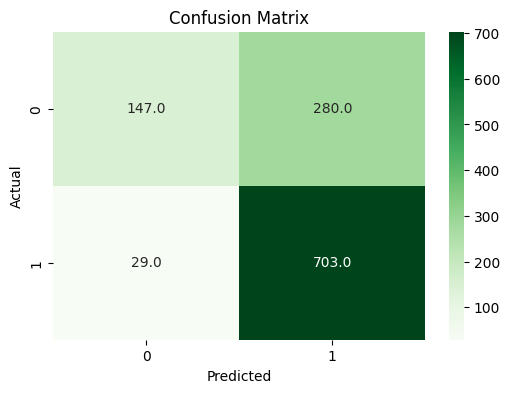

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='.1f',cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()